In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import statistics


In [2]:
df = pd.read_csv("BIKE DETAILS.csv")

In [3]:
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


In [ ]:
#EDA-1
# Range  selling price


In [9]:
df["selling_price"].sort_values(ascending=False)

,selling_price
295,760000
134,750000
289,425000
13,365000
311,330000
...,...
115,7500
77,7500
567,6000
748,6000


In [13]:
range = max(df["selling_price"]) - min(df["selling_price"])
print(range)

755000


In [15]:
# median of selling price
median_price = statistics.median(df["selling_price"])
print(median_price)

45000


In [26]:
df["seller_type"]

,seller_type
0,Individual
1,Individual
2,Individual
3,Individual
4,Individual
...,...
1056,Individual
1057,Individual
1058,Individual
1059,Individual


In [32]:
most_common_seller = df["seller_type"].value_counts().idxmax()

print("Most common seller type:", most_common_seller)

Most common seller type: Individual


In [37]:
#How many bikes have driven more than 50,000 kilometers

df["km_driven"]
total = df[df["km_driven"]> 50000].value_counts().shape[0]
print(total)

86


In [38]:
# What is the average km_driven value for each ownership type


avg_km_per_owner = df.groupby("owner")["km_driven"].mean()
print(avg_km_per_owner)

owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


In [43]:
# What proportion of bikes are from the year 2015 or older

bikes_2015_or_older = df[df["year"] <= 2015].shape[0]

# Total number of bikes
total_bikes = df["year"].value_counts().sum()

#proportion
proportion = bikes_2015_or_older / total_bikes

print(f"Proportion of bikes from 2015 or older: {proportion:.2%}")

Proportion of bikes from 2015 or older: 56.64%


In [48]:
# What is the trend of missing values across the dataset

missing_values = df.isnull().sum()

In [50]:
missing_values = missing_values[missing_values > 0]
print(missing_values)

ex_showroom_price    435
dtype: int64


In [53]:
missing_percentage = (missing_values / len(df)) * 100
print(missing_percentage)

ex_showroom_price    40.999057
dtype: float64


In [59]:
# What is the highest ex_showroom_price recorded, and for which bike

index = df.loc[df["ex_showroom_price"].idxmax()]
print(index)


name                 Harley-Davidson Street Bob
selling_price                            750000
year                                       2013
seller_type                          Individual
owner                                 2nd owner
km_driven                                 12000
ex_showroom_price                     1278000.0
Name: 134, dtype: object


In [64]:
highest_price = index["ex_showroom_price"]
print("Price = " ,highest_price)

Price =  1278000.0


In [63]:
Bike_name = index["name"]
print("Bike_Name= " , Bike_name)

Bike_Name=  Harley-Davidson Street Bob


In [69]:
# What is the total number of bikes listed by each seller type
total_bikes = df["seller_type"].value_counts()
print(total_bikes)

seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64


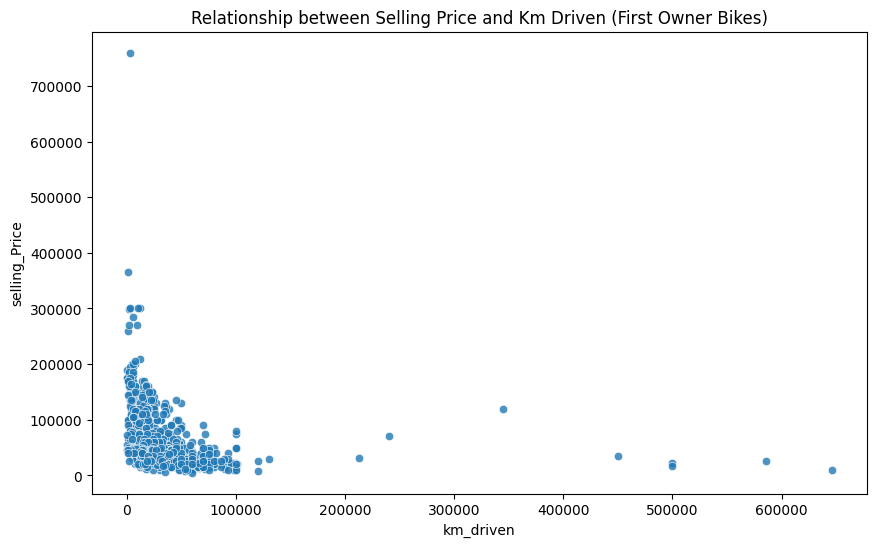

In [72]:
# What is the relationship between selling_price and km_driven for first-owner bikes

First_owner_bikes = df[df["owner"] == "1st owner"]

# Scatter plot to visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(data=First_owner_bikes, x="km_driven", y="selling_price", alpha=0.8)
plt.title("Relationship between Selling Price and Km Driven (First Owner Bikes)")
plt.xlabel("km_driven")
plt.ylabel("selling_Price")
plt.show()

In [74]:
# Identify and remove outliers in the km_driven column using the IQR method

# Defining the IQR method for outlier detection
Q1 = df["km_driven"].quantile(0.25)
Q3 = df["km_driven"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#outliers
df_cleaned = df[(df["km_driven"] >= lower_bound) & (df["km_driven"] <= upper_bound)]
num_outliers = df.shape[0] - df_cleaned.shape[0]
print(f"Number of outliers removed: {num_outliers}")




Number of outliers removed: 39


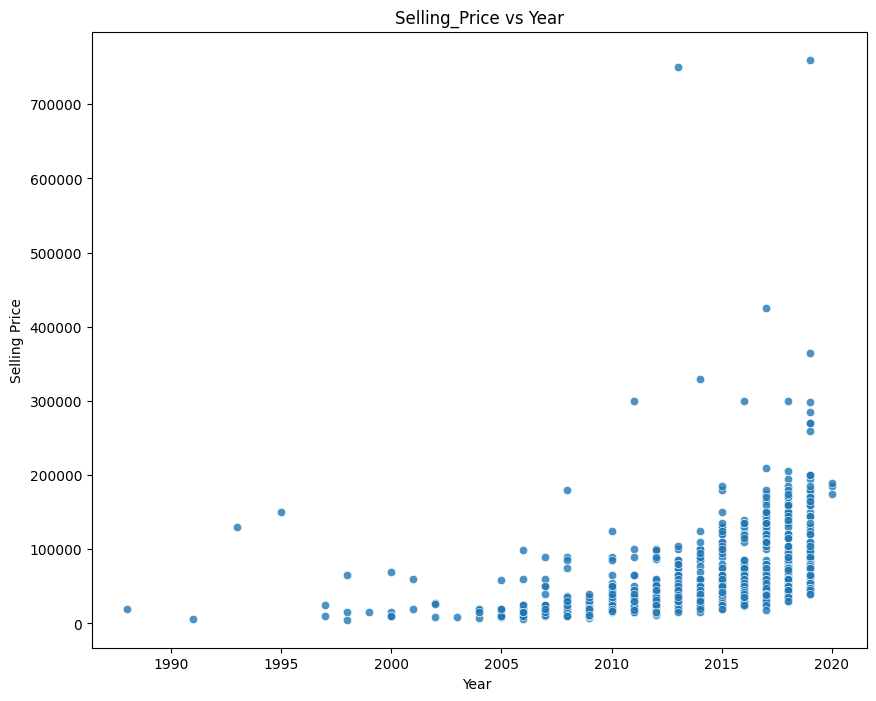

In [76]:
# Perform a bivariate analysis to visualize the relationship between year and selling_price
# Scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x="year", y="selling_price", alpha=0.8)
plt.title("Selling_Price vs Year")
plt.xlabel("Year ")
plt.ylabel("Selling Price")
plt.show()


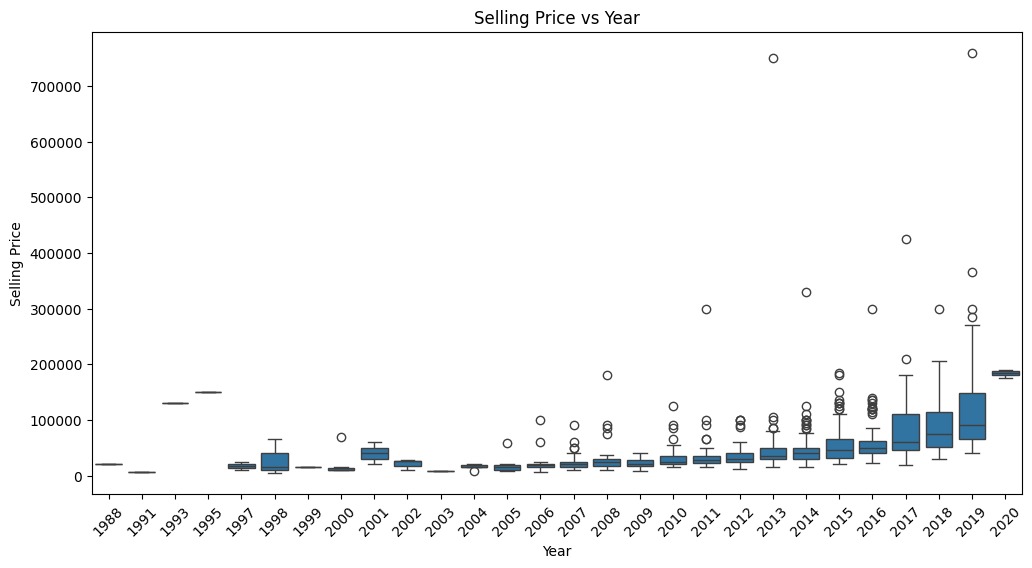

In [77]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="year", y="selling_price")

plt.title("Selling Price vs Year")
plt.xlabel("Year")
plt.ylabel("Selling Price")
plt.xticks(rotation=45)
plt.show()


In [78]:
# What is the average depreciation in selling price based on the bike's age (current year - manufacturing

CURRENT_YEAR = 2025

# Calculating the bike age
df["bike_age"] = CURRENT_YEAR - df["year"]

# Calculating average depreciation per year
depreciation_per_year = df.groupby("bike_age")["selling_price"].mean().diff()

print("Average depreciation in selling price per year:\n", depreciation_per_year)


Average depreciation in selling price per year:
 bike_age
5               NaN
6     -63643.821705
7     -32029.137582
8      -8765.637204
9     -20425.718151
10     -1969.018692
11     -7831.868132
12      2468.854433
13    -15388.586301
14       -92.678689
15     -3862.387978
16     -9525.476190
17     12021.428571
18     -9361.699507
19     -1547.586207
20     -6401.428571
21     -1878.571429
22     -7100.000000
23     12666.666667
24     19333.333333
25    -19166.666667
26     -5833.333333
27     13333.333333
28    -10833.333333
30    132500.000000
32    -20000.000000
34   -124000.000000
37     14000.000000
Name: selling_price, dtype: float64


In [79]:
df["bike_age"]

,bike_age
0,6
1,8
2,7
3,10
4,14
...,...
1056,15
1057,13
1058,12
1059,16


In [81]:
# Which bike names are priced significantly above the average price for their manufacturing year

avg_price = df.groupby("year")["selling_price"].mean()

# Merge the average price per year into the original dataframe
df["Avg_Yearly_Price"] = df["year"].map(avg_price)

threshold = 1.5
expensive_bikes = df[df["selling_price"] > (threshold * df["Avg_Yearly_Price"])]

# Select relevant columns
expensive_bikes = expensive_bikes[["name", "year", "selling_price", "Avg_Yearly_Price"]]

# Display results
print("Bikes priced significantly above the average for their manufacturing year:\n", expensive_bikes)


Bikes priced significantly above the average for their manufacturing year:
                                      name  year  selling_price  \
2     Royal Enfield Classic Gunmetal Grey  2018         150000   
7    Royal Enfield Bullet 350 [2007-2011]  2008         180000   
13                          Yamaha YZF R3  2019         365000   
18    Royal Enfield Classic Gunmetal Grey  2018         150000   
23                          Jawa Standard  2019         180000   
..                                    ...   ...            ...   
979             Royal Enfield Thunder 500  2015         105000   
981             Royal Enfield Thunder 350  2013         105000   
983             Royal Enfield Classic 350  2015         100000   
984             Royal Enfield Classic 500  2014          95000   
985             Royal Enfield Classic 500  2011          90000   

     Avg_Yearly_Price  
2        87660.374046  
7        34289.285714  
13      119689.511628  
18       87660.374046  
23      119

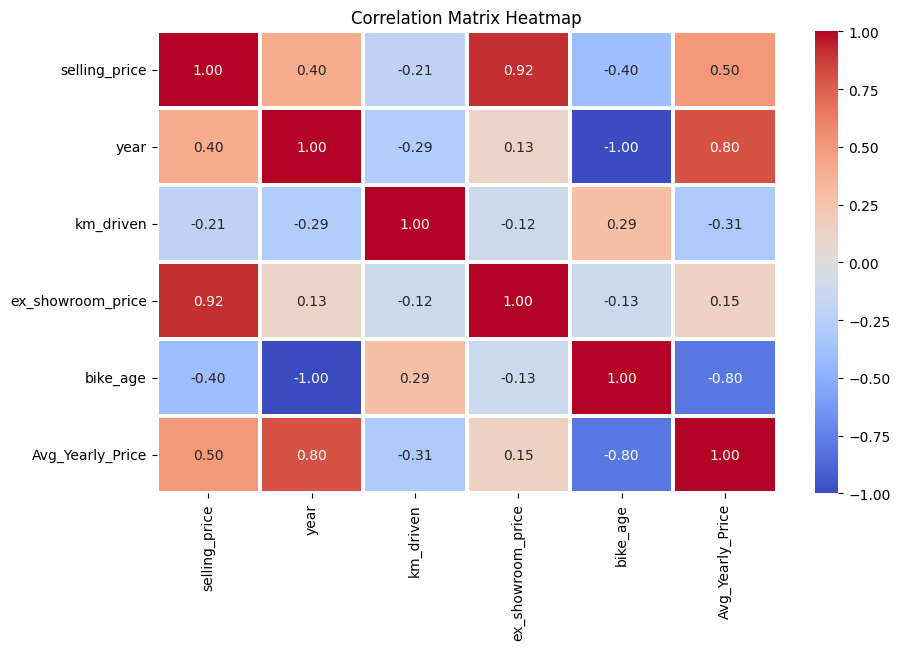

In [84]:
# Develop a correlation matrix for numeric columns and visualize it using a heatmap.

# Selecting only numeric columns
numeric_df = df.select_dtypes(include=["number"])

#correlation matrix
correlation_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=1.5)

# Formatting
plt.title("Correlation Matrix Heatmap")
plt.show()


#            **EDA - 2**
# Title: Car Sale




In [86]:
df = pd.read_csv("Car Sale.csv")
df

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23901,C_CND_023902,12/31/2023,Martin,Male,13500,C & M Motors Inc,Plymouth,Voyager,Overhead Camshaft,Manual,Red,12000,60504-7114,Passenger,8583598,Pasco
23902,C_CND_023903,12/31/2023,Jimmy,Female,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,DoubleÂ Overhead Camshaft,Auto,Black,16000,06457-3834,Hardtop,7914229,Middletown
23903,C_CND_023904,12/31/2023,Emma,Male,705000,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,Manual,Red,21000,99301-3882,Sedan,7659127,Scottsdale
23904,C_CND_023905,12/31/2023,Victoire,Male,13500,Chrysler Plymouth,Chevrolet,Metro,DoubleÂ Overhead Camshaft,Auto,Black,31000,53546-9427,Passenger,6030764,Austin


In [90]:
df.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

Average selling price of cars per dealer:
                                         Dealer_Name     Price ($)
27                                        U-Haul CO  28769.919006
5                                     Classic Chevy  28602.014446
19                             Rabun Used Car Sales  28527.536177
11                                  Iceberg Rentals  28522.958533
8                             Enterprise Rent A Car  28312.580800
23                Scrivener Performance Engineering  28297.371589
9                        Gartner Buick Hyundai Saab  28247.621019
22                                 Saab-Belle Dodge  28190.139888
2                                       Capitol KIA  28189.703822
20                                    Race Car Help  28163.372706
4                            Chrysler of Tri-Cities  28123.091054
24                             Star Enterprises Inc  28113.055244
25                                    Suburban Ford  28112.206758
1                                

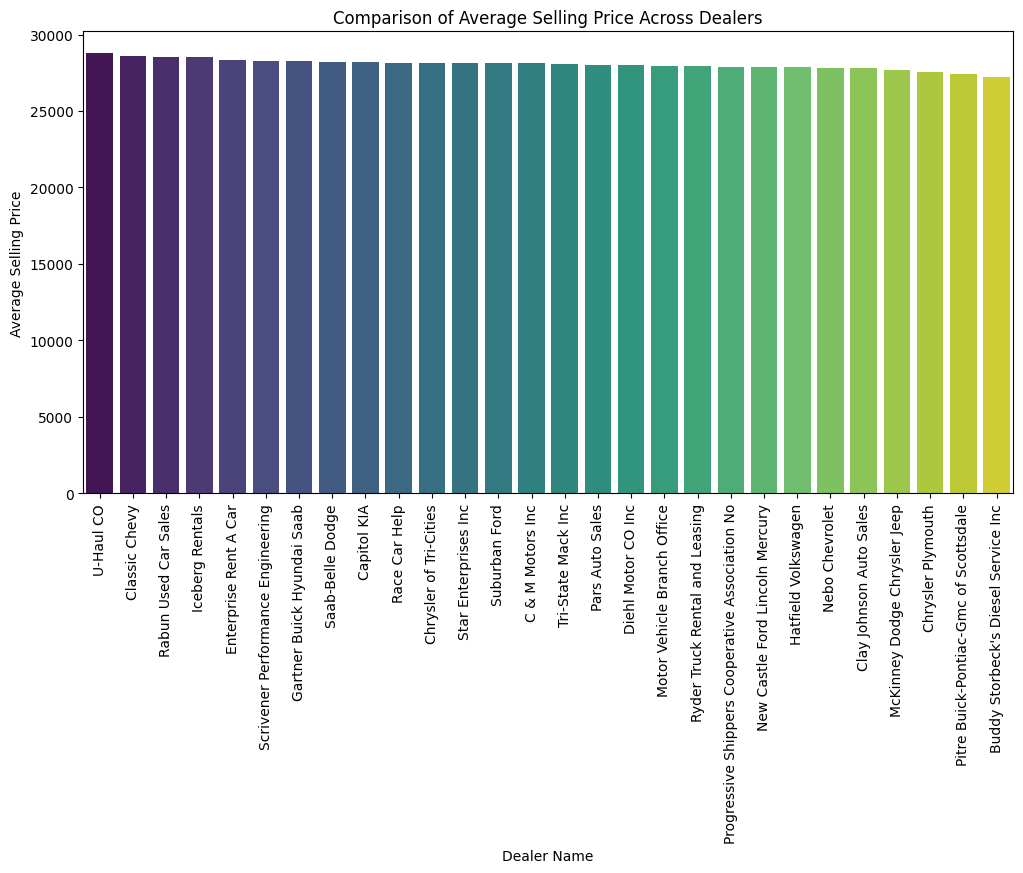

In [93]:
#What is the average selling price of cars for each dealer, and how does it compare across different dealers

dealer_avg_price = df.groupby("Dealer_Name")["Price ($)"].mean().reset_index()
dealer_avg_price = dealer_avg_price.sort_values(by="Price ($)", ascending=False)
print("Average selling price of cars per dealer:\n", dealer_avg_price)

# visualization
plt.figure(figsize=(12, 6))
sns.barplot(data=dealer_avg_price, x="Dealer_Name", y="Price ($)", palette="viridis")

plt.title("Comparison of Average Selling Price Across Dealers")
plt.xlabel("Dealer Name")
plt.ylabel("Average Selling Price")
plt.xticks(rotation=90)
plt.show()


Car brands with the highest price variation:
        Company          mean           std        CV
15     Lincoln  31407.036585  19658.050211  0.625912
24        Saab  36516.338095  19653.740089  0.538218
4     Cadillac  40972.093558  19517.120220  0.476352
21    Plymouth  29404.980551  19065.997338  0.648393
14       Lexus  34024.567332  17852.923492  0.524707
3        Buick  33634.362187  17142.232626  0.509664
17     Mercury  28535.163616  16445.172195  0.576313
19      Nissan  27047.511287  16214.264017  0.599473
25      Saturn  31092.609215  15990.223671  0.514277
8         Ford  29263.682156  15849.090227  0.541596
16  Mercedes-B  26944.842802  15722.807459  0.583518
20  Oldsmobile  31894.250225  15711.345857  0.492607
27      Toyota  29513.120721  15367.131714  0.520688
2          BMW  25090.622785  15065.578723  0.600447
22     Pontiac  29358.300251  14348.963592  0.488753
11    Infiniti  29318.153846  13696.332844  0.467162
5    Chevrolet  26198.606377  13311.063223  0.508083


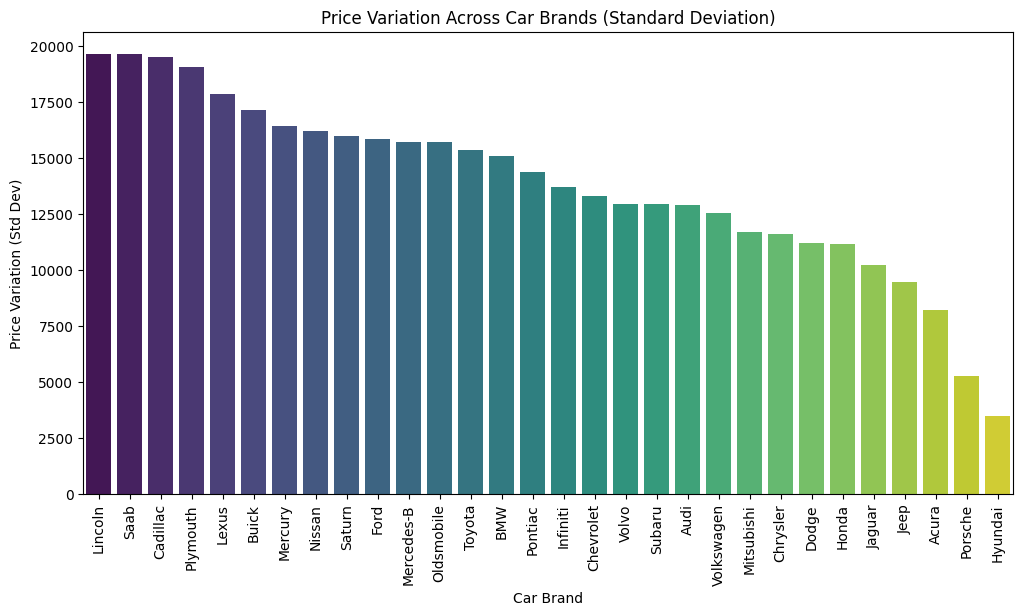

In [94]:
#Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing
#trends

# Group by Car Brand (Company) and computing standard deviation & mean of Price
brand_price_stats = df.groupby("Company")["Price ($)"].agg(["mean", "std"]).reset_index()

# Calculate Coefficient of Variation (CV) for better comparison
brand_price_stats["CV"] = brand_price_stats["std"] / brand_price_stats["mean"]

# Sort brands by highest standard deviation (variation in price)
brand_price_stats = brand_price_stats.sort_values(by="std", ascending=False)

# Display results
print("Car brands with the highest price variation:\n", brand_price_stats)

# Plot bar chart for visualization
plt.figure(figsize=(12, 6))
sns.barplot(data=brand_price_stats, x="Company", y="std", palette="viridis")

plt.title("Price Variation Across Car Brands (Standard Deviation)")
plt.xlabel("Car Brand")
plt.ylabel("Price Variation (Std Dev)")
plt.xticks(rotation=90)
plt.show()


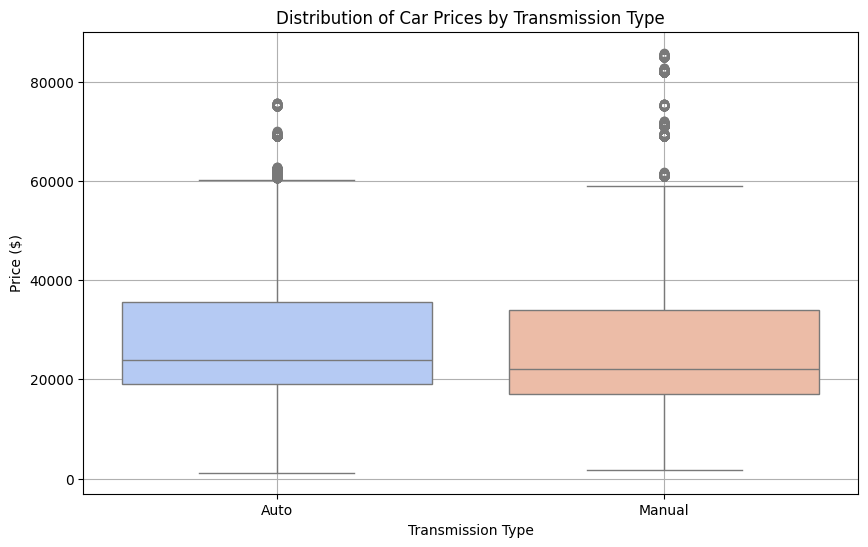

In [96]:
#What is the distribution of car prices for each transmission type, and how do the interquartile ranges
#compare

# Box plot for price distribution by transmission type
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Transmission", y="Price ($)", palette="coolwarm")

# Formatting
plt.title("Distribution of Car Prices by Transmission Type")
plt.xlabel("Transmission Type")
plt.ylabel("Price ($)")
plt.grid()
plt.show()



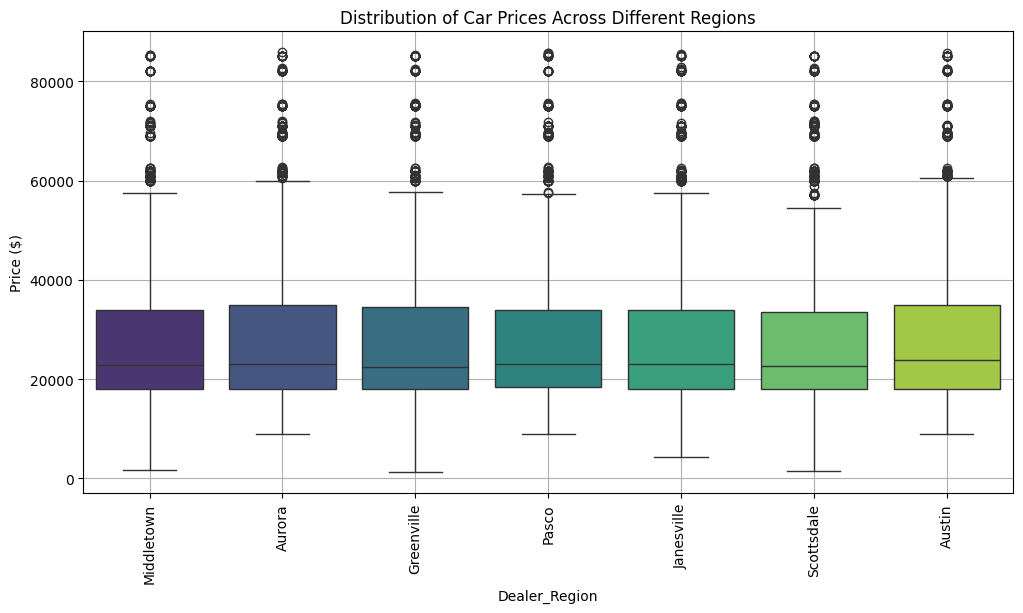

In [97]:
#  What is the distribution of car prices across different regions

# Box plot for price distribution by region
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="Dealer_Region", y="Price ($)", palette="viridis")

# Formatting
plt.title("Distribution of Car Prices Across Different Regions")
plt.xlabel("Dealer_Region")
plt.ylabel("Price ($)")
plt.xticks(rotation=90)
plt.grid()
plt.show()


Car distribution by body style:
 Body Style
SUV          6374
Hatchback    6128
Sedan        4488
Passenger    3945
Hardtop      2971
Name: count, dtype: int64


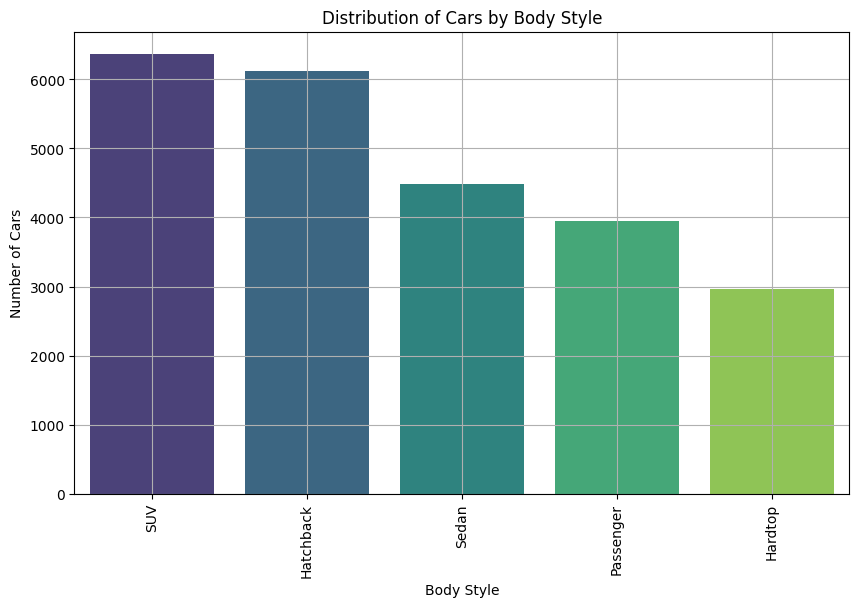

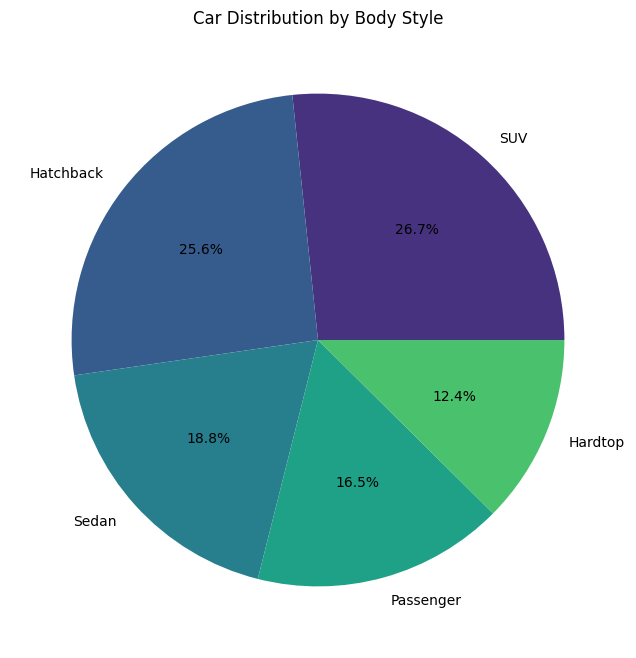

In [100]:
# What is the distribution of cars based on body styles

body_style_counts = df["Body Style"].value_counts()
print("Car distribution by body style:\n", body_style_counts)

# Ploting a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=body_style_counts.index, y=body_style_counts.values, palette="viridis")

# Formatting
plt.title("Distribution of Cars by Body Style")
plt.xlabel("Body Style")
plt.ylabel("Number of Cars")
plt.xticks(rotation=90)
plt.grid()
plt.show()

# Plot a pie chart for percentage distribution
plt.figure(figsize=(8, 8))
plt.pie(body_style_counts, labels=body_style_counts.index, autopct="%1.1f%%", colors=sns.color_palette("viridis"))

# Formatting
plt.title("Car Distribution by Body Style")
plt.show()


In [103]:
# How does the average selling price of cars vary by customer gender and annual income

avg_price = df.groupby(["Gender", "Annual Income"])["Price ($)"].mean().reset_index()

# Display the result
print(avg_price)


      Gender  Annual Income     Price ($)
0     Female          13500  28132.038732
1     Female         106000  46001.000000
2     Female         121000  20000.000000
3     Female         190000  19001.000000
4     Female         211000  51000.000000
...      ...            ...           ...
3437    Male        6600000  39000.000000
3438    Male        6800000  15000.000000
3439    Male        7650000  21000.000000
3440    Male        8000000  85000.000000
3441    Male       11200000  26001.000000

[3442 rows x 3 columns]


In [106]:
# What is the distribution of car prices by region, and how does the number of cars sold vary by region

avg_price_by_region = df.groupby("Dealer_Region")["Price ($)"].mean()
cars_sold_by_region = df["Dealer_Region"].value_counts()
print(" Average Selling Price by Region:\n", avg_price_by_region)
print("\n Number of Cars Sold by Region:\n", cars_sold_by_region)


 Average Selling Price by Region:
 Dealer_Region
Aurora        28334.626837
Austin        28341.603628
Greenville    28180.819054
Janesville    27833.350955
Middletown    27856.338875
Pasco         28119.039923
Scottsdale    27954.958928
Name: Price ($), dtype: float64

 Number of Cars Sold by Region:
 Dealer_Region
Austin        4135
Janesville    3821
Scottsdale    3433
Pasco         3131
Aurora        3130
Greenville    3128
Middletown    3128
Name: count, dtype: int64


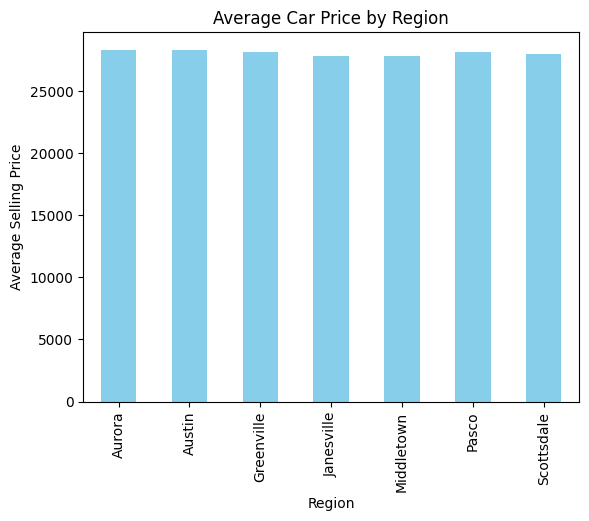

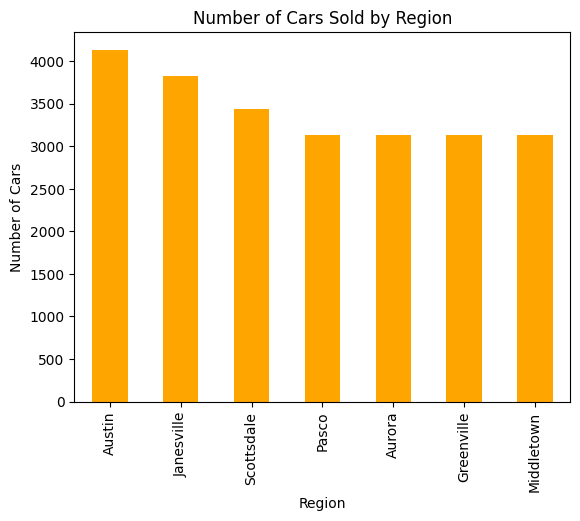

In [107]:
#Plot Average Price by Region
avg_price_by_region.plot(kind="bar", title="Average Car Price by Region", color="skyblue")
plt.ylabel("Average Selling Price")
plt.xlabel("Region")
plt.show()

# Plot Number of Cars Sold by Region
cars_sold_by_region.plot(kind="bar", title="Number of Cars Sold by Region", color="orange")
plt.ylabel("Number of Cars")
plt.xlabel("Dealer_Region")
plt.show()

In [108]:
# How does the average car price differ between cars with different engine sizes

avg_price_by_engine = df.groupby("Engine")["Price ($)"].mean()
print("Average Selling Price by Engine:\n", avg_price_by_engine)


Average Selling Price by Engine:
 Engine
DoubleÂ Overhead Camshaft    28248.525972
Overhead Camshaft            27914.710631
Name: Price ($), dtype: float64


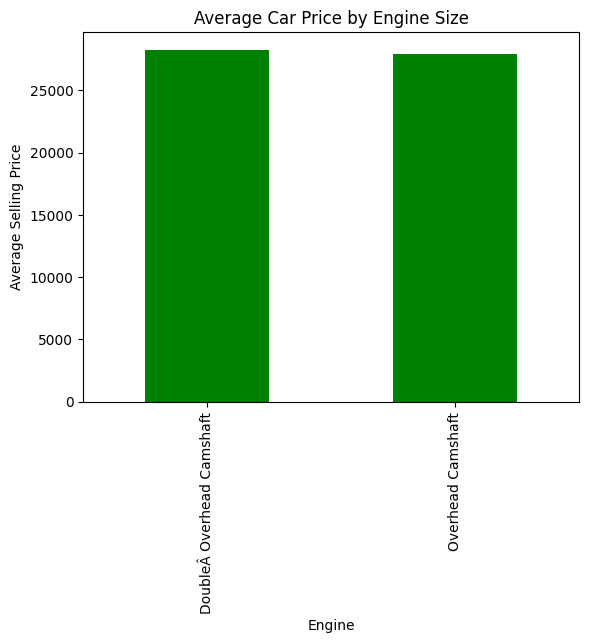

In [110]:
#visualise
avg_price_by_engine.plot(kind="bar", title="Average Car Price by Engine Size", color="green")
plt.ylabel("Average Selling Price")
plt.xlabel("Engine")
plt.xticks(rotation=90)
plt.show()


In [111]:
#  How do car prices vary based on the customer’s annual income bracket

avg_price_by_income = df.groupby("Annual Income")["Price ($)"].mean()
print(avg_price_by_income)

Annual Income
10080       22801.000000
13500       27878.981415
24000       61001.000000
85000       43000.000000
106000      46001.000000
                ...     
6600000     39000.000000
6800000     15000.000000
7650000     21000.000000
8000000     85000.000000
11200000    26001.000000
Name: Price ($), Length: 2508, dtype: float64


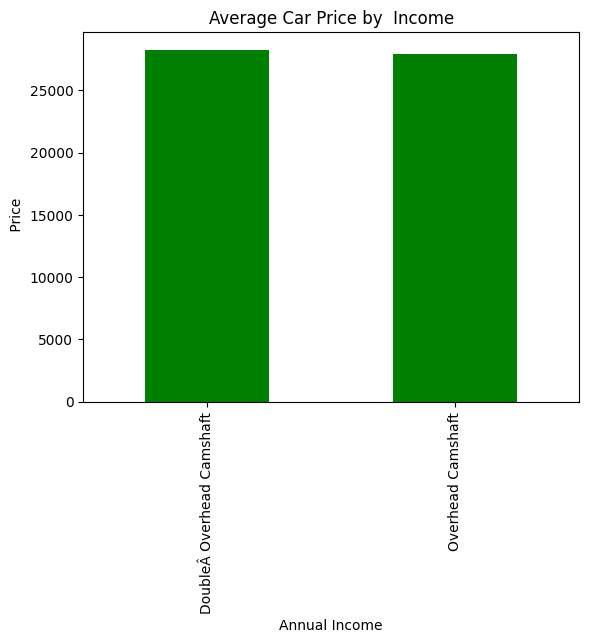

In [112]:
#visualise
avg_price_by_engine.plot(kind="bar", title="Average Car Price by  Income", color="green")
plt.ylabel(" Price")
plt.xlabel("Annual Income")
plt.xticks(rotation=90)
plt.show()


Top 5 Best-Selling Car Models:
 Model
Diamante      418
Prizm         411
Silhouette    411
Passat        391
Ram Pickup    383
Name: count, dtype: int64


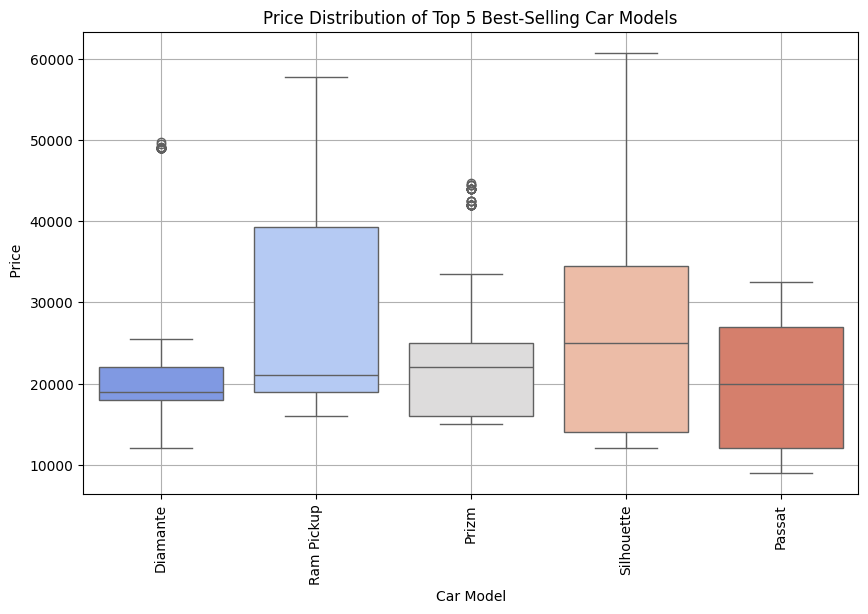

In [115]:
# What are the top 5 car models with the highest number of sales, and how does their price distribution look

top_5_models = df["Model"].value_counts().head(5).index
top_5_data = df[df["Model"].isin(top_5_models)]

print("Top 5 Best-Selling Car Models:\n", df["Model"].value_counts().head(5))

#visualization
plt.figure(figsize=(10, 6))
sns.boxplot(data=top_5_data, x="Model", y="Price ($)", palette="coolwarm")

plt.title("Price Distribution of Top 5 Best-Selling Car Models")
plt.xlabel("Car Model")
plt.ylabel(" Price")
plt.xticks(rotation=90)
plt.grid()

plt.show()


 Car Colors with Highest Price Variation:
 Color
Red           15519.360962
Black         15286.065976
Pale White    14077.346859
Name: Price ($), dtype: float64


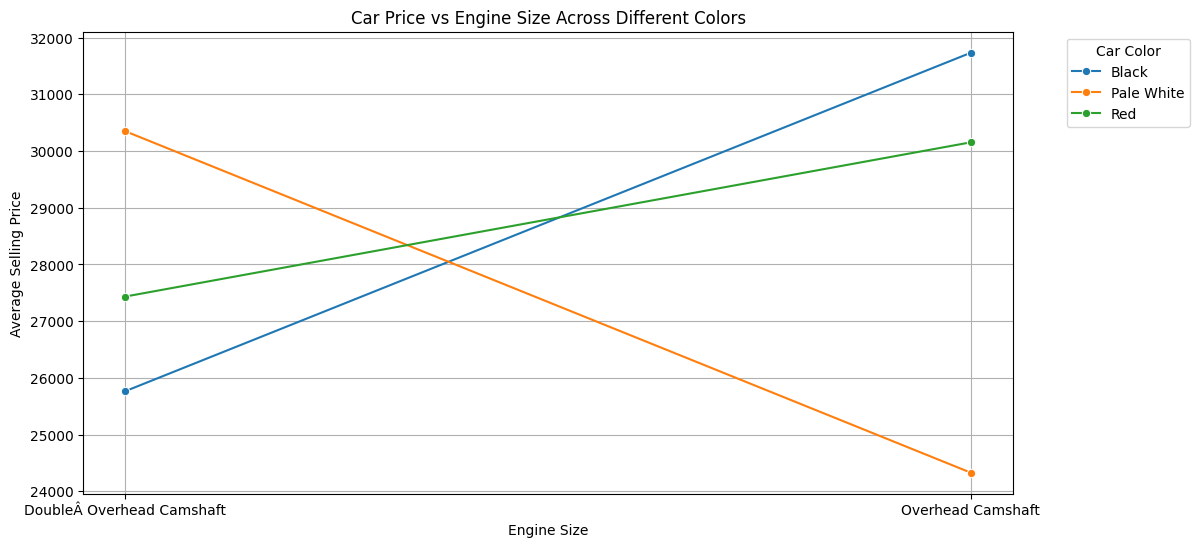

In [117]:
#How does car price vary with engine size across different car colors, and which colors have the highest price
# variation

avg_price_by_color_engine = df.groupby(["Color", "Engine"])["Price ($)"].mean().reset_index()
price_variation_by_color = df.groupby("Color")["Price ($)"].std().sort_values(ascending=False)

#price variation
print(" Car Colors with Highest Price Variation:\n", price_variation_by_color.head(5))

# Visualization
plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_price_by_color_engine, x="Engine", y="Price ($)", hue="Color", marker="o", palette="tab10")

plt.title("Car Price vs Engine Size Across Different Colors")
plt.xlabel("Engine Size")
plt.ylabel("Average Selling Price")
plt.legend(title="Car Color", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid()

plt.show()


 Monthly Car Sales:
 Sale_Month
1      790
2      735
3     1535
4     1655
5     1895
6     1715
7     1725
8     1705
9     3305
10    1830
11    3470
12    3546
Name: count, dtype: int64


TypeError: 'int' object is not callable

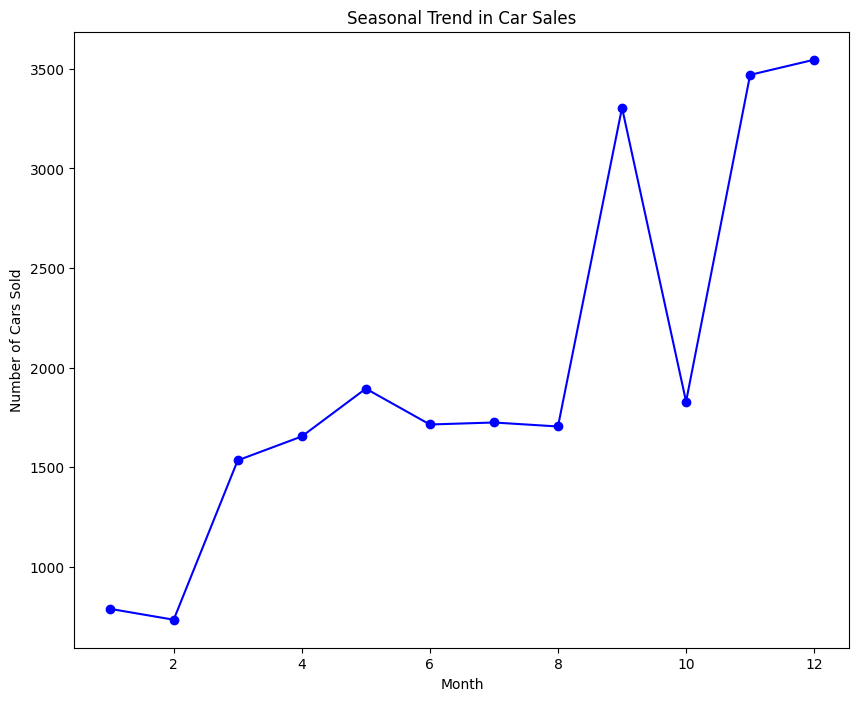

In [124]:
# Is there any seasonal trend in car sales based on the date of sale

df["Sale_Date"] = pd.to_datetime(df["Date"])
df["Sale_Month"] = df["Sale_Date"].dt.month

monthly_sales = df["Sale_Month"].value_counts().sort_index()

print(" Monthly Car Sales:\n", monthly_sales)

# Plotting
plt.figure(figsize=(10, 8))
plt.plot(monthly_sales.index, monthly_sales.values, marker="o", linestyle="-", color="blue")

# Formatting
plt.title("Seasonal Trend in Car Sales")
plt.xlabel("Month")
plt.ylabel("Number of Cars Sold")
plt.xticks(ticks=range(1, 13), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])

plt.grid()

plt.show()


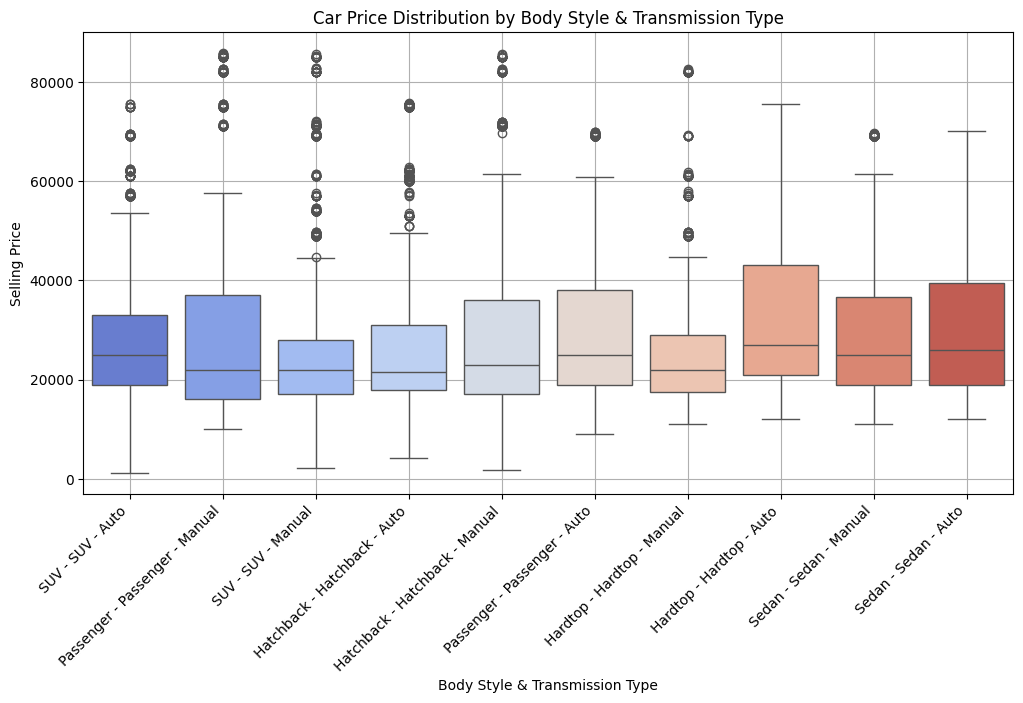

In [126]:
#How does the car price distribution change when considering different combinations of body style and
# transmission type

df["Transmission"] = df["Body Style"] + " - " + df["Transmission"]

#plotting
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="Transmission", y="Price ($)", palette="coolwarm")


plt.title("Car Price Distribution by Body Style & Transmission Type")
plt.xlabel("Body Style & Transmission Type")
plt.ylabel("Selling Price")
plt.xticks(rotation=45, ha="right")
plt.grid()

plt.show()


In [139]:
# What is the correlation between car price, engine size, and annual income of customers, and how do these features interact

corr_features = df[["Price ($)", "Engine", "Annual Income"]]

correlation_matrix = corr_features.corr()

# Display correlation values
print(" Correlation Matrix:\n", correlation_matrix)

# Heatmap to visualize correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Formatting
plt.title("Correlation Between Car Price, Engine Size & Annual Income")
plt.show()

# Pairplot to analyze feature interactions
sns.pairplot(corr_features, kind="reg", diag_kind="kde", plot_kws={"line_kws":{"color":"red"}})
plt.show()


ValueError: could not convert string to float: 'DoubleÂ\xa00'

In [129]:
df["Engine"]

,Engine
0,DoubleÂ Overhead Camshaft
1,DoubleÂ Overhead Camshaft
2,Overhead Camshaft
3,Overhead Camshaft
4,DoubleÂ Overhead Camshaft
...,...
23901,Overhead Camshaft
23902,DoubleÂ Overhead Camshaft
23903,Overhead Camshaft
23904,DoubleÂ Overhead Camshaft


 Correlation Matrix:
                Price ($)  Annual Income
Price ($)       1.000000       0.012065
Annual Income   0.012065       1.000000


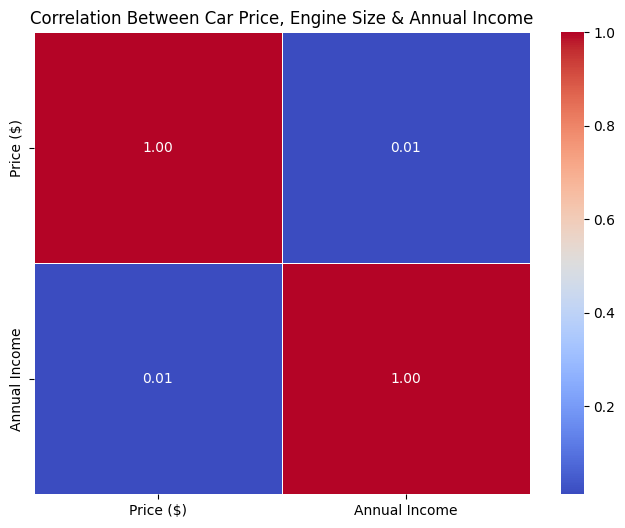

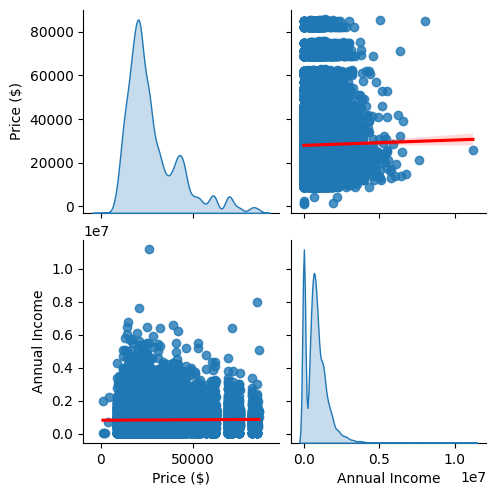

In [138]:
# What is the correlation between car price, engine size, and annual income of customers, and how do these features interact

corr_features = df[["Price ($)", "Annual Income"]]

correlation_matrix = corr_features.corr()
print(" Correlation Matrix:\n", correlation_matrix)

# Heatmap to visualize correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Formatting
plt.title("Correlation Between Car Price, Engine Size & Annual Income")
plt.show()

# Pairplot to analyze feature interactions
sns.pairplot(corr_features, kind="reg", diag_kind="kde", plot_kws={"line_kws":{"color":"red"}})
plt.show()


 Average Car Price by Model & Engine Type:
     Model     Engine     Price ($)
0   3-Sep  DoubleÂ 0  37986.380117
1  3000GT          0  21770.659864
2  3000GT  DoubleÂ 0  22764.326923
3    300M  DoubleÂ 0  21394.888889
4    323i          0  21038.162162


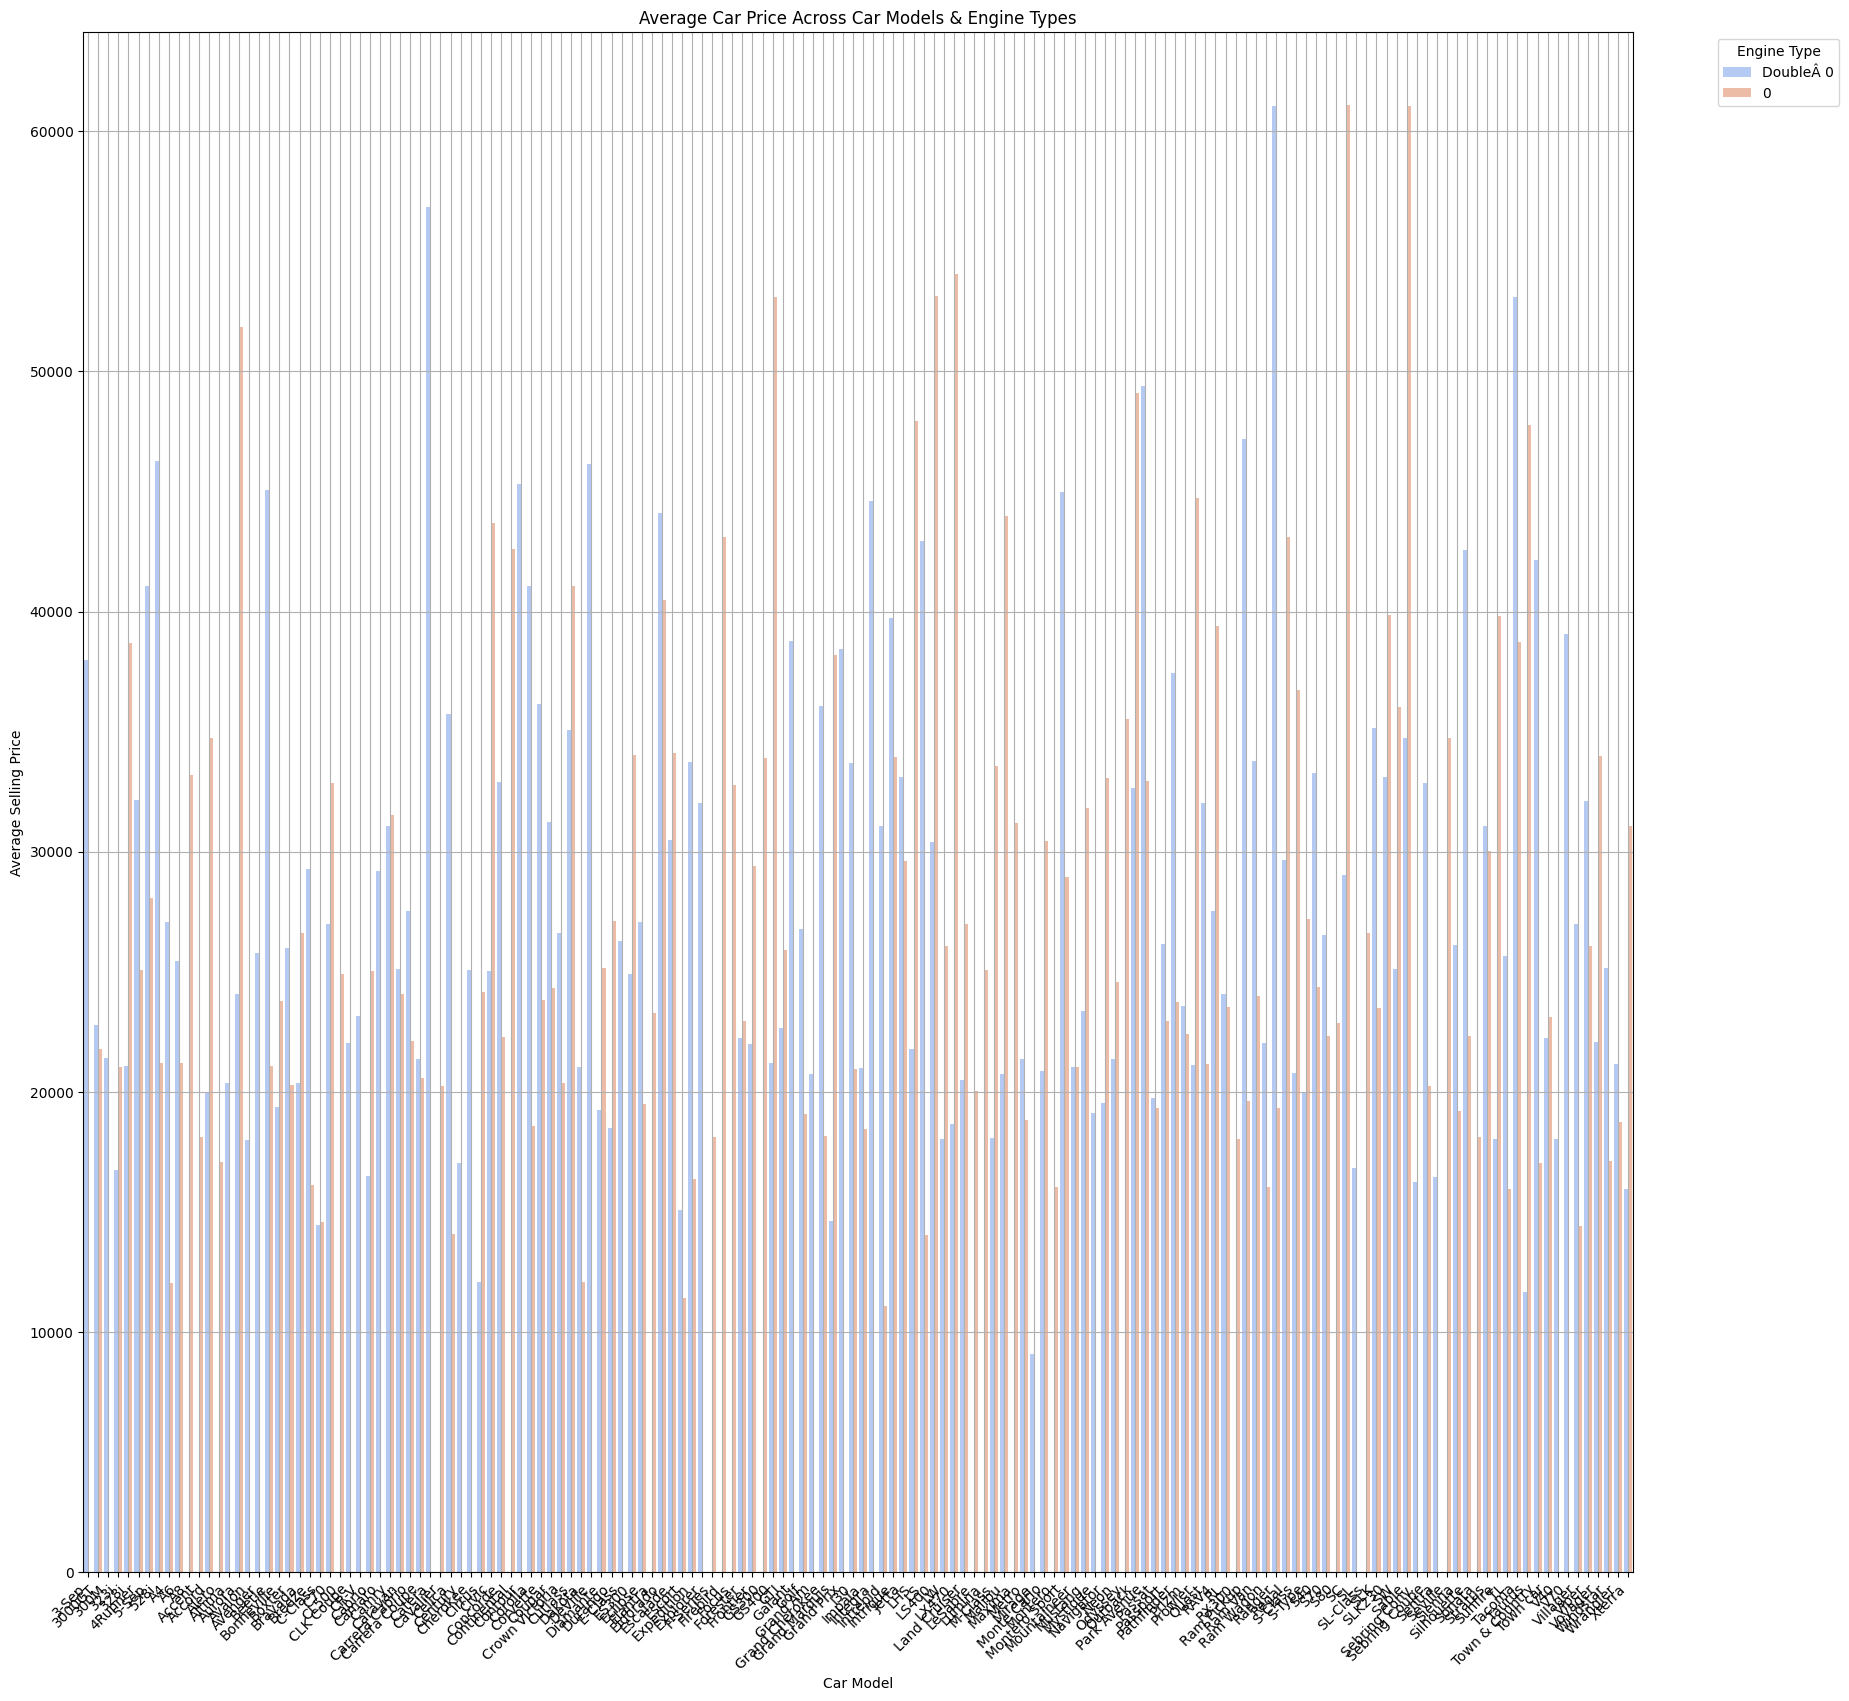

In [147]:
# How does the average car price vary across different car models and engine types?

avg_price_by_model_engine = df.groupby(["Model", "Engine"])["Price ($)"].mean().reset_index()

print(" Average Car Price by Model & Engine Type:\n", avg_price_by_model_engine.head())

# Plot bar chart for visualization
plt.figure(figsize=(20, 20))
sns.barplot(data=avg_price_by_model_engine, x="Model", y="Price ($)", hue="Engine", palette="coolwarm")

plt.title("Average Car Price Across Car Models & Engine Types")
plt.xlabel("Car Model")
plt.ylabel("Average Selling Price")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Engine Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid()

plt.show()


# **EDA-3**

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import statistics



df = pd.read_csv("amazon.csv")
df

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,₹379,₹919,59%,4,"1,090",SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹2,280","₹3,045",25%,4.1,"4,118","230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the me

In [6]:
df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [8]:
# What is the average rating for each product category

df["rating"] = pd.to_numeric(df["rating"], errors="coerce")

avg_rating_by_category = df.groupby("category")["rating"].mean().reset_index()

print(" Average Rating for Each Product Category:\n", avg_rating_by_category)

# Sorting
avg_rating_by_category = avg_rating_by_category.sort_values(by="rating", ascending=False)




 Average Rating for Each Product Category:
                                               category    rating
0    Car&Motorbike|CarAccessories|InteriorAccessori...  3.800000
1    Computers&Accessories|Accessories&Peripherals|...  4.150000
2    Computers&Accessories|Accessories&Peripherals|...  3.500000
3    Computers&Accessories|Accessories&Peripherals|...  3.600000
4    Computers&Accessories|Accessories&Peripherals|...  4.050000
..                                                 ...       ...
206  OfficeProducts|OfficePaperProducts|Paper|Stati...  4.250000
207  OfficeProducts|OfficePaperProducts|Paper|Stati...  4.150000
208  OfficeProducts|OfficePaperProducts|Paper|Stati...  4.300000
209  OfficeProducts|OfficePaperProducts|Paper|Stati...  4.133333
210  Toys&Games|Arts&Crafts|Drawing&PaintingSupplie...  4.300000

[211 rows x 2 columns]


In [9]:
# What are the top rating_count products by category


df["rating_Count"] = pd.to_numeric(df["rating_count"], errors="coerce")

# Find the product with the highest rating count in each category
top_rated_products = df.loc[df.groupby("category")["rating_count"].idxmax(), ["category", "product_name", "rating_count"]]

print(" Top Rated Products by Category:\n", top_rated_products)


 Top Rated Products by Category:
                                                category  \
1157  Car&Motorbike|CarAccessories|InteriorAccessori...   
695   Computers&Accessories|Accessories&Peripherals|...   
906   Computers&Accessories|Accessories&Peripherals|...   
772   Computers&Accessories|Accessories&Peripherals|...   
844   Computers&Accessories|Accessories&Peripherals|...   
...                                                 ...   
616   OfficeProducts|OfficePaperProducts|Paper|Stati...   
993   OfficeProducts|OfficePaperProducts|Paper|Stati...   
765   OfficeProducts|OfficePaperProducts|Paper|Stati...   
850   OfficeProducts|OfficePaperProducts|Paper|Stati...   
924   Toys&Games|Arts&Crafts|Drawing&PaintingSupplie...   

                                           product_name rating_count  
1157  Reffair AX30 [MAX] Portable Air Purifier for C...        1,118  
695   rts [2 Pack] Mini USB C Type C Adapter Plug, T...        4,426  
906   Hp Wired On Ear Headphones With Mic Wi

In [10]:
df["actual_price"]

,actual_price
0,"₹1,099"
1,₹349
2,"₹1,899"
3,₹699
4,₹399
...,...
1460,₹919
1461,"₹3,045"
1462,"₹3,080"
1463,"₹1,890"


In [11]:
df["actual_price"] = df["actual_price"].astype(str)
df['actual_price']

,actual_price
0,"₹1,099"
1,₹349
2,"₹1,899"
3,₹699
4,₹399
...,...
1460,₹919
1461,"₹3,045"
1462,"₹3,080"
1463,"₹1,890"


In [12]:
df["discounted_price"] = df["discounted_price"].astype(str)
df["discounted_price"]

,discounted_price
0,₹399
1,₹199
2,₹199
3,₹329
4,₹154
...,...
1460,₹379
1461,"₹2,280"
1462,"₹2,219"
1463,"₹1,399"


In [13]:
char_to_remove = [ "₹",","]
cols_to_remove = ["actual_price" , "discounted_price"]

for char in char_to_remove:
    for col in cols_to_remove:
        df[col] = df[col].str.replace(char, "")

In [14]:
df

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,rating_Count
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399,1099,64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,NaN
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199,349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,NaN
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199,1899,90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,NaN
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329,699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,NaN
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154,399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,379,919,59%,4.0,"1,090",SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...,NaN
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,2280,3045,25%,4.1,"4,118","230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as men

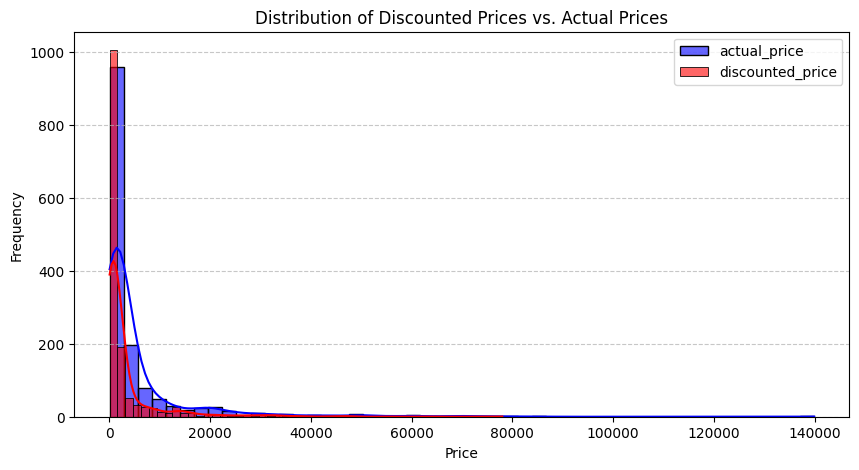

In [50]:
# What is the distribution of discounted prices vs. actual prices


#Histogram Plot
plt.figure(figsize=(10, 5))
sns.histplot(df["actual_price"], label="actual_price", color="blue", bins=50, alpha=0.6, kde=True)
sns.histplot(df["discounted_price"], label="discounted_price", color="red", bins=50, alpha=0.6, kde=True)

plt.title("Distribution of Discounted Prices vs. Actual Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()


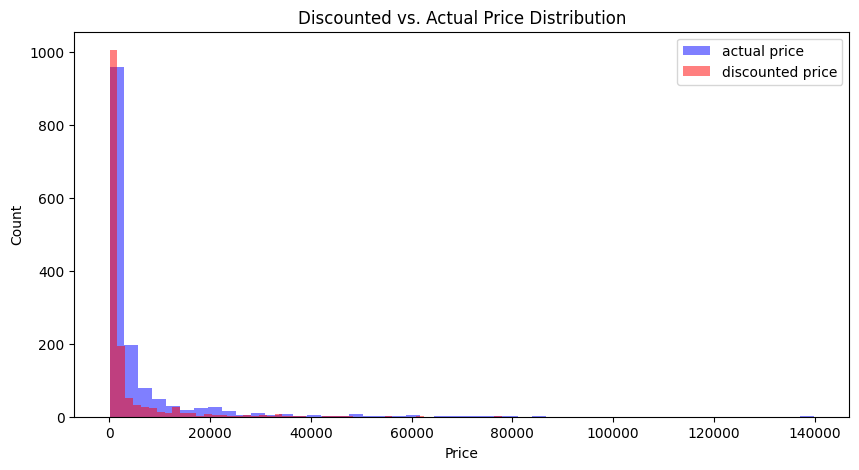

In [16]:

df = df.dropna(subset=["actual_price", "discounted_price"])

# Plot actual vs discounted price
plt.figure(figsize=(10, 5))
plt.hist(df["actual_price"], bins=50, alpha=0.5, label="actual price", color="blue")
plt.hist(df["discounted_price"], bins=50, alpha=0.5, label="discounted price", color="red")

# Formatting
plt.title("Discounted vs. Actual Price Distribution")
plt.xlabel("Price")
plt.ylabel("Count")
plt.legend()
plt.show()


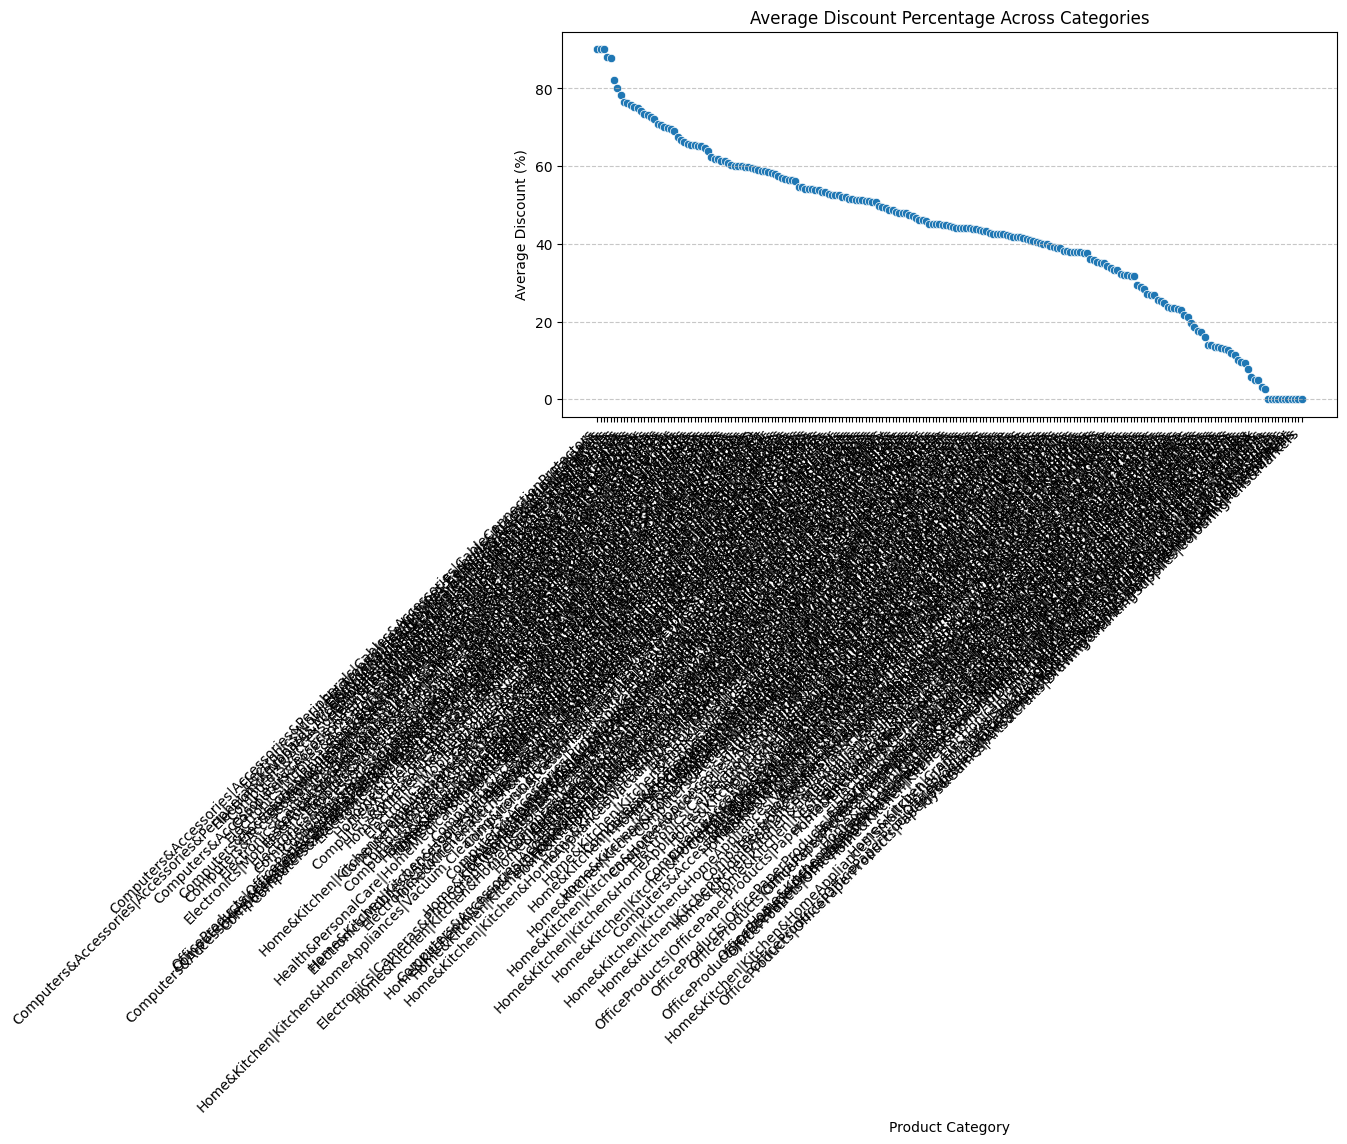

In [26]:
# How does the average discount percentage vary across categories

df = df.dropna(subset=["actual_price", "discounted_price", "category"])


df["Discount_Percentage"] = ((df["actual_price"] - df["discounted_price"]) / df["actual_price"]) * 100

avg_discount_by_category = df.groupby("category")["Discount_Percentage"].mean().reset_index()

avg_discount_by_category = avg_discount_by_category.sort_values(by="Discount_Percentage", ascending=False)

# Plot bar chart
plt.figure(figsize=(10, 5))
sns.scatterplot(data=avg_discount_by_category, x="category", y="Discount_Percentage", palette="coolwarm")

plt.title("Average Discount Percentage Across Categories")
plt.xlabel("Product Category")
plt.ylabel("Average Discount (%)")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()


In [18]:
# What are the most popular product names

popular_products = df["product_name"].value_counts().head(10)
print("Top 10 Most Popular Products:\n", popular_products)


Top 10 Most Popular Products:
 product_name
Fire-Boltt Ninja Call Pro Plus 1.83" Smart Watch with Bluetooth Calling, AI Voice Assistance, 100 Sports Modes IP67 Rating, 240*280 Pixel High Resolution                                                  5
Fire-Boltt Phoenix Smart Watch with Bluetooth Calling 1.3",120+ Sports Modes, 240*240 PX High Res with SpO2, Heart Rate Monitoring & IP67 Rating                                                           4
Amazonbasics Nylon Braided Usb-C To Lightning Cable, Fast Charging Mfi Certified Smartphone, Iphone Charger (6-Foot, Dark Grey)                                                                            3
Duracell USB Lightning Apple Certified (Mfi) Braided Sync & Charge Cable For Iphone, Ipad And Ipod. Fast Charging Lightning Cable, 3.9 Feet (1.2M) - Black                                                 3
Flix Micro Usb Cable For Smartphone (Black)                                                                                             

In [35]:
#
from collections import Counter
import re
all_product_names = " ".join(df["product_name"].dropna())

all_product_names = re.sub(r"[^a-zA-Z0-9\s]", "", all_product_names).lower()
word_counts = Counter(all_product_names.split())

top_keywords = word_counts.most_common(10)
print("Top 10 Most Popular Product Keywords:\n", top_keywords)


Top 10 Most Popular Product Keywords:
 [('with', 752), ('for', 674), ('black', 468), ('cable', 401), ('usb', 390), ('and', 330), ('charging', 246), ('to', 218), ('fast', 211), ('c', 188)]


In [42]:
# What are the most popular product reviews

df = df.dropna(subset=["review_content"])

# Count the most common reviews
top_reviews = df["review_content"].value_counts().head(10)

top_rated_reviews = df[df["rating"] == df["rating"].max()]["review_content"].value_counts().head(10)

print("Top 10 Highest-Rated Product Reviews:\n", top_rated_reviews)



📌 Top 10 Highest-Rated Product Reviews:
 review_content
Product is good in quality. Working good with my i phone 7.,Good quality and really fast charging and packing is also like original one worth product,Good product and good quality,Working well with iphone11.,                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [36]:
df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link', 'rating_Count',
       'Discount_Percentage'],
      dtype='object')

In [37]:
df


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,rating_Count,Discount_Percentage
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,NaN,63.694268
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,NaN,42.979943
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,NaN,89.520800
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,NaN,52.932761
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,NaN,61.403509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,379.0,919.0,59%,4.0,"1,090",SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...,NaN,58.759521
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,2280.0,3045.0,25%,4.1,"4,118","230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R

In [43]:
# What is the correlation between discounted_price and rating


df["discounted_price"] = pd.to_numeric(df["discounted_price"], errors="coerce")
df["rating"] = pd.to_numeric(df["rating"], errors="coerce")

# Drop missing values to avoid errors
df = df.dropna(subset=["discounted_price", "rating"])

# Calculate correlation
correlation = df["discounted_price"].corr(df["rating"])

print(f"Correlation between Discounted Price and Rating: {correlation:.2f}")


Correlation between Discounted Price and Rating: 0.12


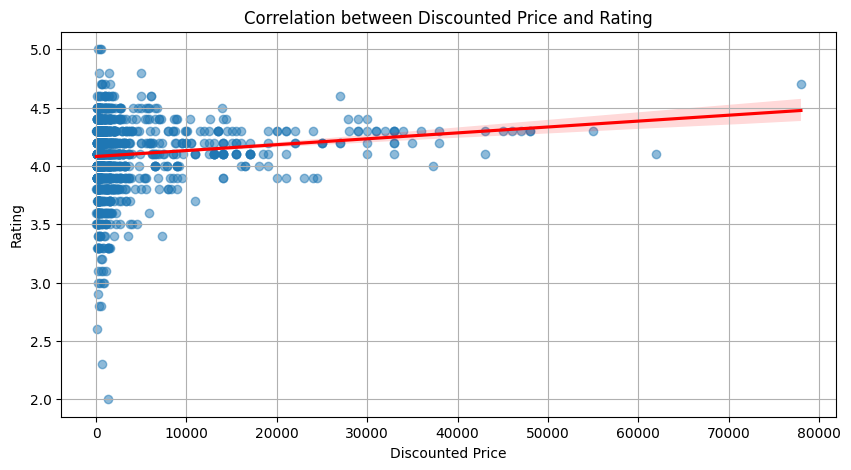

In [44]:
plt.figure(figsize=(10, 5))
sns.regplot(x=df["discounted_price"], y=df["rating"], scatter_kws={"alpha":0.5}, line_kws={"color":"red"})

# Formatting
plt.title("Correlation between Discounted Price and Rating")
plt.xlabel("Discounted Price")
plt.ylabel("Rating")
plt.grid(True)

# Show plot
plt.show()

In [45]:
# What are the Top 5 categories based on the highest ratings

df["rating"] = pd.to_numeric(df["rating"], errors="coerce")

df = df.dropna(subset=["rating", "category"])
top_categories = df.groupby("category")["rating"].mean().sort_values(ascending=False).head(5)
print("Top 5 Categories Based on Highest Ratings:\n", top_categories)


Top 5 Categories Based on Highest Ratings:
 category
Computers&Accessories|Tablets                                               4.6
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters    4.5
Electronics|Cameras&Photography|Accessories|Film                            4.5
Computers&Accessories|Components|Memory                                     4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients                4.5
Name: rating, dtype: float64


In [47]:
# Identify any potential areas for improvement or optimization based on the data analysis.

#Identifying Low-Rated Categories
df["rating"] = pd.to_numeric(df["rating"], errors="coerce")
low_rated_categories = df.groupby("category")["rating"].mean().sort_values().head(5)
print("Low-Rated Categories:\n", low_rated_categories)





Low-Rated Categories:
 category
Home&Kitchen|Kitchen&HomeAppliances|Coffee,Tea&Espresso|CoffeeGrinders|ElectricGrinders                          3.3
Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|Keyboard&MiceAccessories|DustCovers    3.4
Electronics|HomeTheater,TV&Video|Accessories|3DGlasses                                                           3.5
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets                                  3.5
Computers&Accessories|Printers,Inks&Accessories|Printers|InkjetPrinters                                          3.6
Name: rating, dtype: float64


# **EDA-4**

In [3]:
df = pd.read_csv("spotify.csv")
df

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe
...,...,...,...,...,...
435,French Montana,Splash Brothers,44,221863,3fBsEOnzwtlkpS0LxXAZhN
436,Fat Joe,All The Way Up (feat. Infared),64,191900,7Ezwtgfw7khBrpvaNPtMoT
437,A$AP Ferg,"Work REMIX (feat. A$AP Rocky, French Montana, ...",69,283693,7xVLFuuYdAvcTfcP3IG3dS
438,Diddy,Another One Of Me (feat. 21 Savage),65,220408,4hGmQboiou09EwhcTWa0H6


In [4]:
df.columns

Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID'], dtype='object')

In [6]:
df.shape

(440, 5)

In [5]:
# Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do the needful
print(df.isnull().sum())



Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64


In [7]:
df.duplicated().sum()

np.int64(27)

In [8]:
df = df.drop_duplicates()

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.shape

(413, 5)

In [12]:
# What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram

df["Popularity"] = pd.to_numeric(df["Popularity"], errors="coerce")



In [13]:
df = df.dropna(subset=["Popularity"])
print(df)

             Artist                                         Track Name  \
0             Drake            Rich Baby Daddy (feat. Sexyy Red & SZA)   
1             Drake                                          One Dance   
2             Drake                                 IDGAF (feat. Yeat)   
3             Drake               First Person Shooter (feat. J. Cole)   
4             Drake                      Jimmy Cooks (feat. 21 Savage)   
..              ...                                                ...   
433  French Montana                                       Stand United   
434    Jason Derulo                     Tip Toe (feat. French Montana)   
436         Fat Joe                     All The Way Up (feat. Infared)   
437       A$AP Ferg  Work REMIX (feat. A$AP Rocky, French Montana, ...   
438           Diddy                Another One Of Me (feat. 21 Savage)   

     Popularity  Duration (ms)                Track ID  
0            92         319191  1yeB8MUNeLo9Ek1UEpsyz6

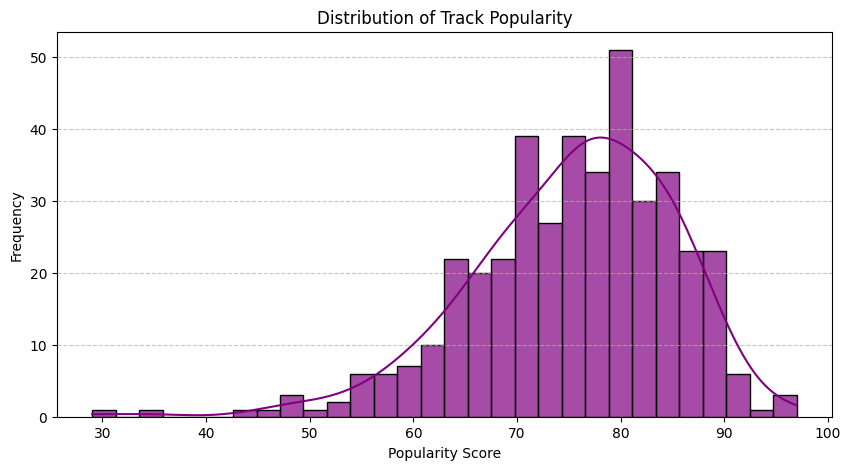

In [14]:
#Histogram
plt.figure(figsize=(10, 5))
sns.histplot(df["Popularity"], bins=30, kde=True, color="purple", alpha=0.7)

plt.title("Distribution of Track Popularity")
plt.xlabel("Popularity Score")
plt.ylabel("Frequency")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

In [64]:
# Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot


df["Popularity"] = pd.to_numeric(df["Popularity"], errors="coerce")
df["Duration (ms)"] = pd.to_numeric(df["Duration (ms)"], errors="coerce")

df = df.dropna(subset=["Popularity", "Duration (ms)"])



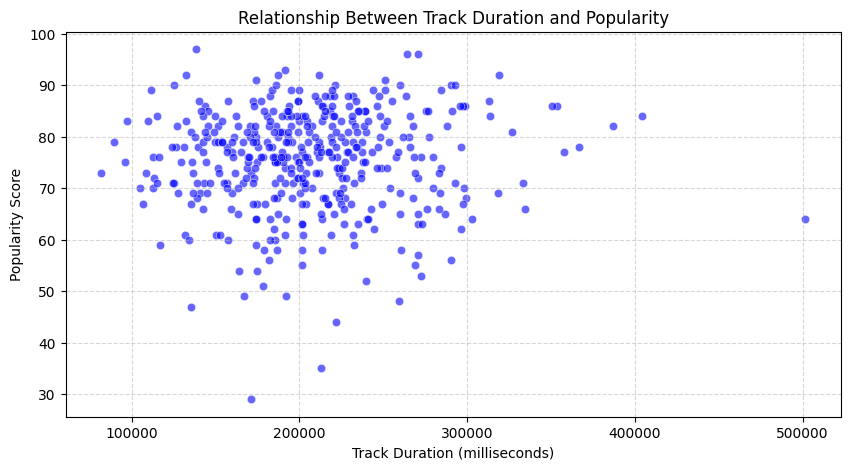

In [65]:

# Scatter Plot
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x="Duration (ms)", y="Popularity", alpha=0.6, color="blue")

plt.title("Relationship Between Track Duration and Popularity")
plt.xlabel("Track Duration (milliseconds)")
plt.ylabel("Popularity Score")
plt.grid(linestyle="--", alpha=0.5)

plt.show()


In [66]:
#Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot

artist_track_count = df["Artist"].value_counts().reset_index()
artist_track_count.columns = ["Artist", "Track_Count"]



In [67]:
top_artists = artist_track_count.head(10)

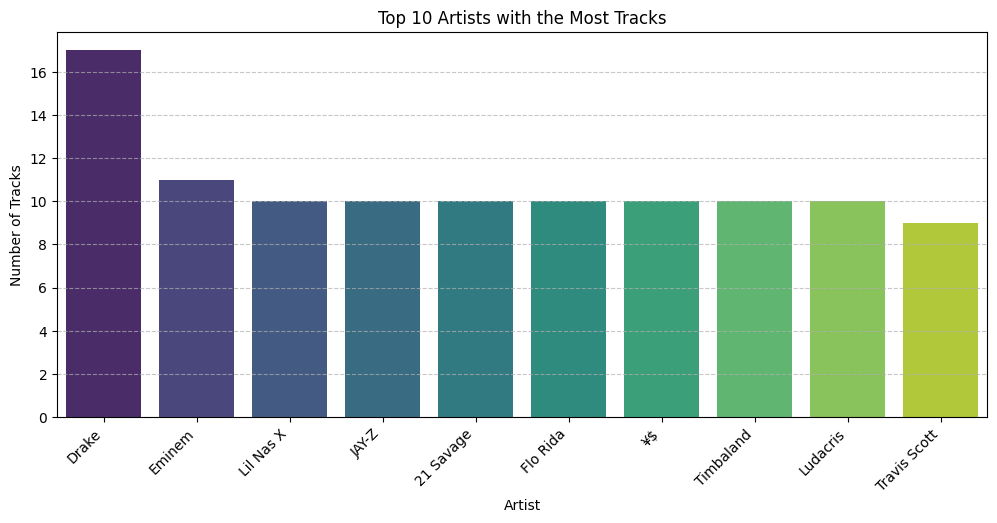

In [68]:
#Count Plot
plt.figure(figsize=(12, 5))
sns.barplot(data=top_artists, x="Artist", y="Track_Count", palette="viridis")

plt.title("Top 10 Artists with the Most Tracks")
plt.xlabel("Artist")
plt.ylabel("Number of Tracks")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()


In [16]:
# What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each

df["Popularity"] = pd.to_numeric(df["Popularity"], errors="coerce")

df = df.dropna(subset=["Popularity"])
least_popular_tracks = df.sort_values(by="Popularity", ascending=True).head(5)[["Artist", "Track Name", "Popularity"]]

print("\n Top 5 Least Popular Tracks:")
print(least_popular_tracks)



 Top 5 Least Popular Tracks:
             Artist                     Track Name  Popularity
207          Pressa  Attachments (feat. Coi Leray)          29
231   Justin Bieber                     Intentions          35
413  French Montana                Splash Brothers          44
225        Lil Baby                  On Me - Remix          47
407     Wyclef Jean      911 (feat. Mary J. Blige)          48


In [17]:
#Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist

df["Popularity"] = pd.to_numeric(df["Popularity"], errors="coerce")
df = df.dropna(subset=["Popularity"])

artist_avg_popularity = df.groupby("Artist")["Popularity"].mean().reset_index()
top_5_artists = artist_avg_popularity.sort_values(by="Popularity", ascending=False).head(5)

# Identifying the artist with the highest average popularity
most_popular_artist = top_5_artists.iloc[0]

print("\n Top 5 Artists by Average Popularity:")
print(top_5_artists)

print(f"\n The most popular artist on average: {most_popular_artist['Artist']} with an average popularity of {most_popular_artist['Popularity']:.2f}")



 Top 5 Artists by Average Popularity:
           Artist  Popularity
113         cassö   92.000000
104        Trueno   89.000000
24   David Guetta   87.000000
103  Travis Scott   86.555556
114            ¥$   85.100000

 The most popular artist on average: cassö with an average popularity of 92.00


In [18]:
# For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist

df["Popularity"] = pd.to_numeric(df["Popularity"], errors="coerce")
df = df.dropna(subset=["Popularity"])

# Calculating average popularity per artist
artist_avg_popularity = df.groupby("Artist")["Popularity"].mean().reset_index()

# Sort by average popularity (descending) and get the top 5 artists
top_5_artists = artist_avg_popularity.sort_values(by="Popularity", ascending=False).head(5)["Artist"]

# Find the most popular track for each of these top 5 artists
top_tracks = df[df["Artist"].isin(top_5_artists)].sort_values(by=["Artist", "Popularity"], ascending=[True, False])
most_popular_tracks = top_tracks.groupby("Artist").first().reset_index()[["Artist", "Track Name", "Popularity"]]

print("\n Most Popular Tracks for the Top 5 Artists:")
print(most_popular_tracks)



 Most Popular Tracks for the Top 5 Artists:
         Artist                    Track Name  Popularity
0  David Guetta            Baby Don't Hurt Me          87
1  Travis Scott    FE!N (feat. Playboi Carti)          93
2        Trueno  Mamichula - con Nicki Nicole          89
3         cassö                         Prada          92
4            ¥$                      CARNIVAL          96


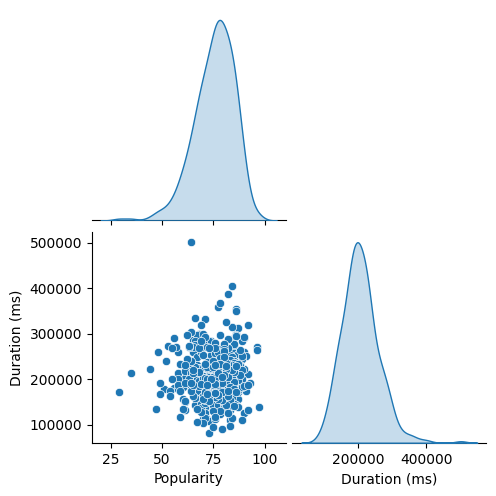

In [19]:
# Visualize relationships between multiple numerical variables simultaneously using a pair plot


numeric_cols = df.select_dtypes(include=["number"])

# Create a pair plot
sns.pairplot(numeric_cols, diag_kind="kde", corner=True)
plt.show()


In [21]:
#Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot

df["Duration (ms)"] = pd.to_numeric(df["Duration (ms)"], errors="coerce")

# Selecting the top 10 artists with the most tracks
top_artists = df["Artist"].value_counts().head(10).index
df_top_artists = df[df["Artist"].isin(top_artists)]





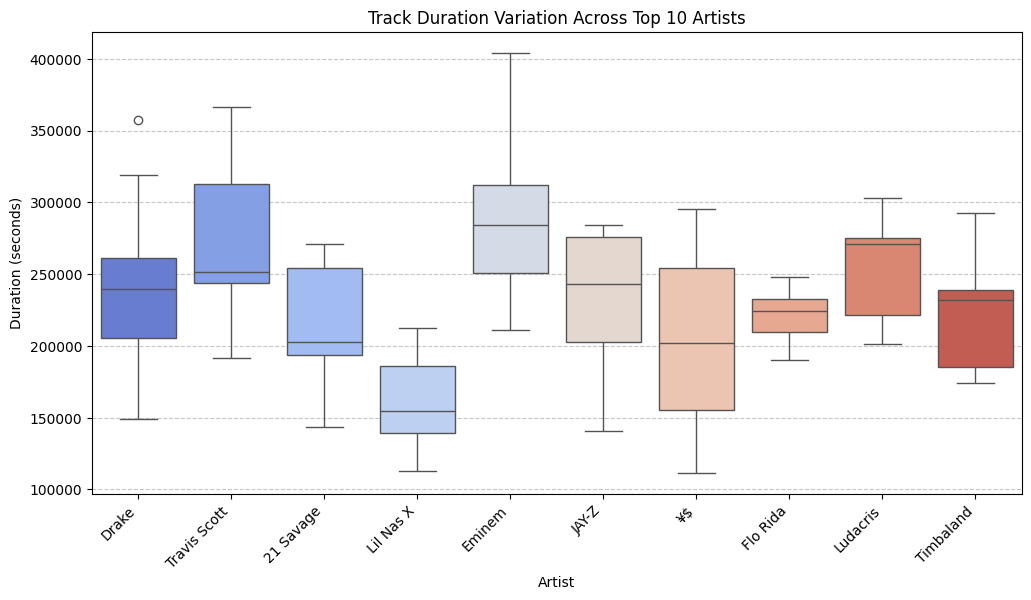

In [22]:
#Box Plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_top_artists, x="Artist", y="Duration (ms)", palette="coolwarm")
plt.xticks(rotation=45, ha="right")
plt.title("Track Duration Variation Across Top 10 Artists")
plt.xlabel("Artist")
plt.ylabel("Duration (seconds)")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

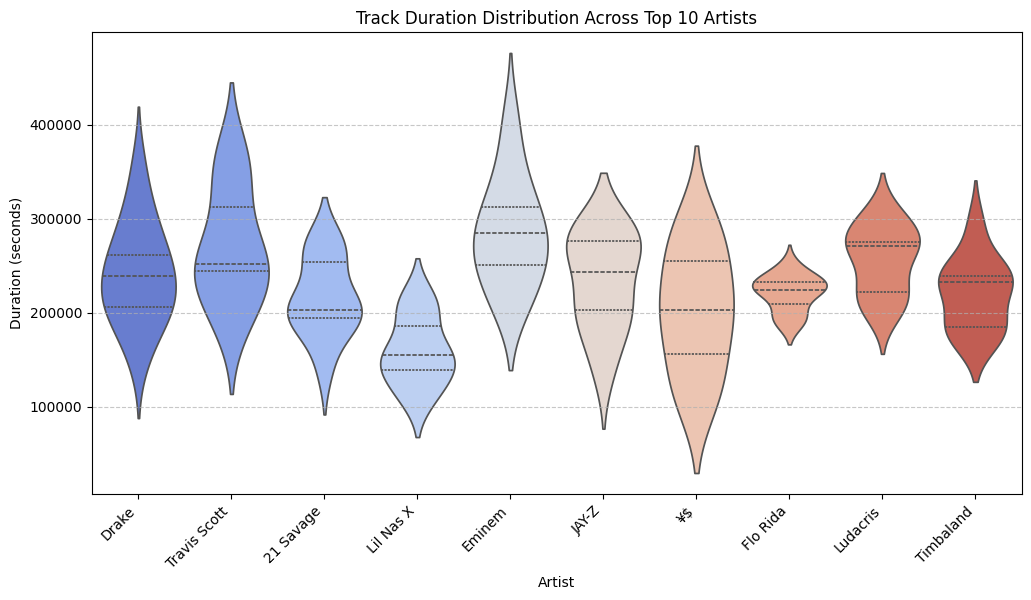

In [23]:
#Violin Plot (Alternative)
plt.figure(figsize=(12, 6))
sns.violinplot(data=df_top_artists, x="Artist", y="Duration (ms)", palette="coolwarm", inner="quartile")
plt.xticks(rotation=45, ha="right")
plt.title("Track Duration Distribution Across Top 10 Artists")
plt.xlabel("Artist")
plt.ylabel("Duration (seconds)")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


In [26]:
# How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot

# Ensuring Popularity column is numeric
df["Popularity"] = pd.to_numeric(df["Popularity"], errors="coerce")

# Selecting the top 10 artists with the most tracks
top_artists = df["Artist"].value_counts().head(10).index
df_top_artists = df[df["Artist"].isin(top_artists)]





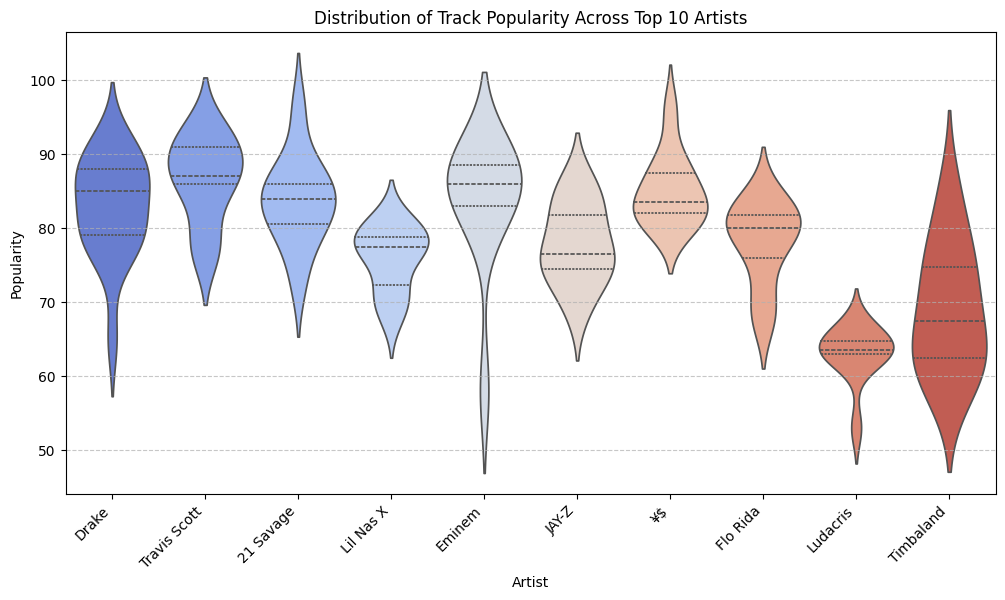

In [27]:
#Violin Plot
plt.figure(figsize=(12, 6))
sns.violinplot(data=df_top_artists, x="Artist", y="Popularity", palette="coolwarm", inner="quartile")
plt.xticks(rotation=45, ha="right")
plt.title("Distribution of Track Popularity Across Top 10 Artists")
plt.xlabel("Artist")
plt.ylabel("Popularity")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

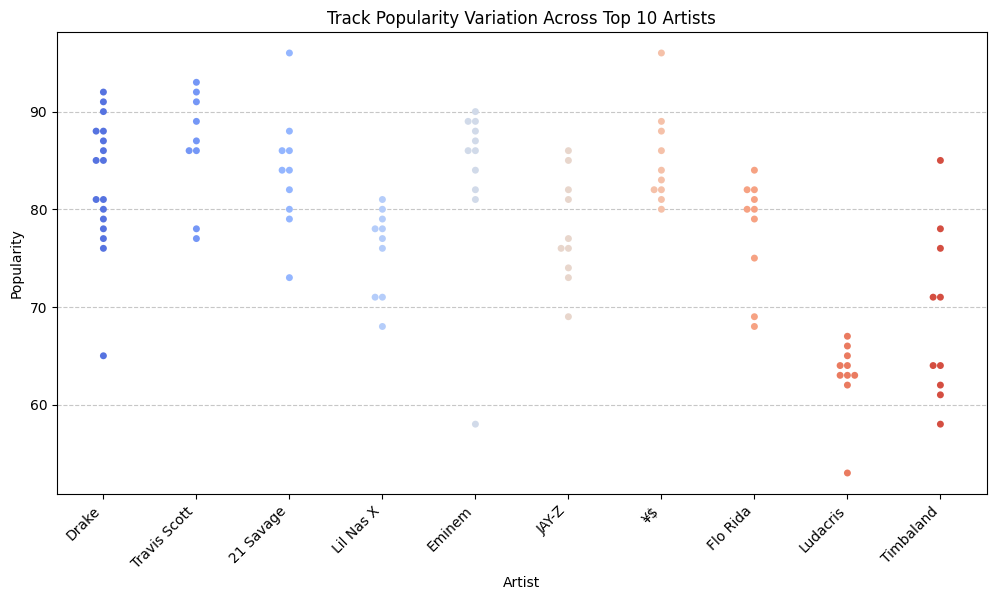

In [28]:
#Swarm Plot (Alternative)
plt.figure(figsize=(12, 6))
sns.swarmplot(data=df_top_artists, x="Artist", y="Popularity", palette="coolwarm", size=5)
plt.xticks(rotation=45, ha="right")
plt.title("Track Popularity Variation Across Top 10 Artists")
plt.xlabel("Artist")
plt.ylabel("Popularity")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()
